In [28]:
import math
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage

def g_kernel(t=3, s=5):
    filt = np.arange(np.ceil(-s*np.sqrt(t)),np.ceil(s*np.sqrt(t))+1)
    g = np.exp(-( (filt)**2 / ( 2.0 * t ) ) )/np.sqrt(t*2*np.pi)
    dg_2 = np.exp(-( (filt)**2 / ( 2.0 * t ) ) )/(np.sqrt(t*2*np.pi)*t)*(filt**2/t**2-1/t)
    return g, dg_2
im = cv2.imread("week_2_data/test_blob_uniform.png", cv2.IMREAD_GRAYSCALE)
im = im.astype(float)


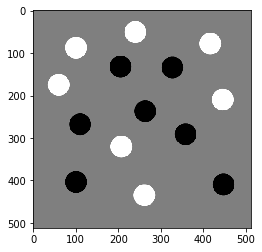

In [29]:
plt.imshow(im, cmap="gray")
plt.show()
g, dg_2 = g_kernel(t=25**2/2)
g, dg_2_2 = g_kernel(t=25**2/2)
#im_c = ndimage.convolve(im, g)
#im_c = ndimage.convolve(im_c, g.transpose())
#im_c_2 = ndimage.convolve(im, dg_2)
#im_c_2 = ndimage.convolve(im_c_2, dg_2.transpose())
#plt.imshow(im_c, cmap="gray")
#plt.show()
#plt.imshow(im_c_2, cmap="gray")
#plt.show()

[ 2.28522583e-11  2.95244826e-11  3.80115612e-11  4.87669869e-11
  6.23461111e-11  7.94259315e-11  1.00827937e-10  1.27544287e-10
  1.60767578e-10  2.01924416e-10  2.52712943e-10  3.15144390e-10
  3.91588612e-10  4.84823426e-10  5.98087380e-10  7.35135399e-10
  9.00296468e-10  1.09853225e-09  1.33549519e-09  1.61758436e-09
  1.95199673e-09  2.34677141e-09  2.81082376e-09  3.35396590e-09
  3.98690981e-09  4.72124883e-09  5.56941293e-09  6.54459326e-09
  7.66063086e-09  8.93186510e-09  1.03729371e-08  1.19985443e-08
  1.38231426e-08  1.58605939e-08  1.81237573e-08  2.06240257e-08
  2.33708081e-08  2.63709631e-08  2.96281902e-08  3.31423873e-08
  3.69089867e-08  4.09182847e-08  4.51547808e-08  4.95965479e-08
  5.42146547e-08  5.89726657e-08  6.38262434e-08  6.87228803e-08
  7.36017862e-08  7.83939583e-08  8.30224561e-08  8.74029031e-08
  9.14442319e-08  9.50496843e-08  9.81180714e-08  1.00545293e-07
  1.02226105e-07  1.03056117e-07  1.02933990e-07  1.01763803e-07
  9.94575345e-08  9.59376

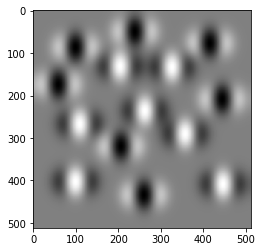

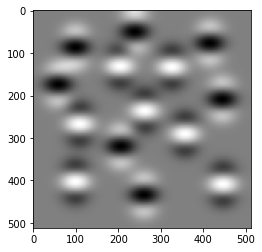

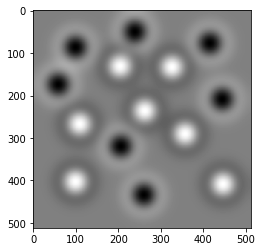

In [33]:
Lxx = ndimage.filters.convolve1d(im, dg_2.transpose(), axis=1)
Lxx = ndimage.filters.convolve1d(Lxx, g, axis=0)
print(dg_2)
Lyy = ndimage.filters.convolve1d(im, dg_2, axis=0)
Lyy = ndimage.filters.convolve1d(Lyy, g.transpose(), axis=1)

plt.imshow(Lxx, cmap="gray")
plt.show()
plt.imshow(Lyy, cmap="gray")
plt.show()
plt.imshow(Lyy+Lxx, cmap="gray")
plt.show()


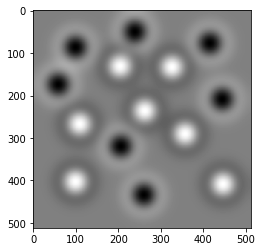

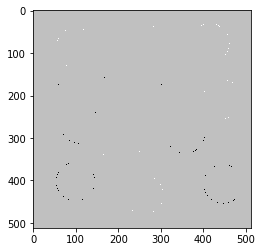

In [52]:
def blobdetection(im):
    blob_im = np.empty(im.shape, dtype=float)
    blob_im.fill(np.average(blob_im))
    im_min = np.amin(im)
    im_max = np.amax(im)
    for i, row in enumerate(im):
        for j, col in enumerate(row):
            neighbours = []
            if j != 0:
                neighbours.append(im[i][j-1])
            if j != 0 and i != 0:
                neighbours.append(im[i-1][j-1])
            if j != len(row)-1 and i != 0:
                neighbours.append(im[i-1][j+1])
            if j != 0 and i != len(im)-1:
                neighbours.append(im[i+1][j-1])
            if j != len(row)-1 and i != len(im)-1:
                neighbours.append(im[i+1][j+1])
            if j != len(row)-1:
                neighbours.append(im[i][j+1])
            if i != 0:
                neighbours.append(im[i-1][j])
            if i != len(im)-1:
                neighbours.append(im[i+1][j])
            val = im[i][j]
            if val <= min(neighbours):
                blob_im[i][j] = -1
            elif val >= max(neighbours):
                blob_im[i][j] = 1
    blob_im = blob_im*np.average(blob_im)
    return blob_im


im_to_blob = Lxx+Lyy
plt.imshow(im_to_blob, cmap="gray")
plt.show()
plt.imshow(blobdetection(im_to_blob), cmap="gray")
plt.show()

[[433 260]
 [319 206]
 [209 444]
 [174  59]
 [ 87 100]
 [ 77 415]
 [ 50 239]]


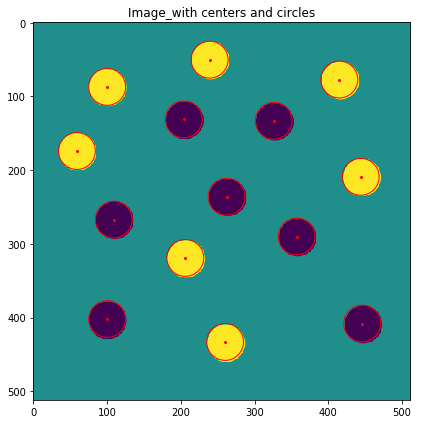

In [55]:
from skimage import feature

center_min = feature.peak_local_max(-im_to_blob, min_distance=1, threshold_rel=0.9)
center_max = feature.peak_local_max(im_to_blob, min_distance=1, threshold_rel=0.9)
print(center_min)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
im1 = ax.imshow(im, cmap='viridis')
ax.set_title('Image_with centers and circles')
ax.scatter(center_min[:,1], center_min[:,0], c='red', s=4)
ax.scatter(center_max[:,1], center_max[:,0], c='red', s=4)
for iCirc in range(len(center_min[:,1])):
    circ = plt.Circle((center_min[iCirc,1], center_min[iCirc,0]), 25, edgecolor='red', facecolor='None', fill=False)
    ax.add_artist(circ)
    circ = plt.Circle((center_max[iCirc,1], center_max[iCirc,0]), 25, edgecolor='red', facecolor='None', fill=False)
    ax.add_artist(circ)
fig.show()
fig.tight_layout()